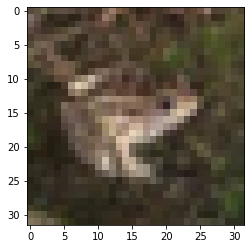

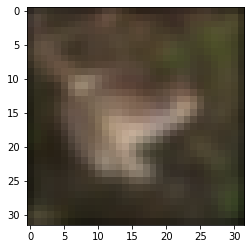

In [17]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# source image
source_img = x_train[22]
h = 32
w = 32
plt.imshow(source_img)
plt.show()

# separate channels
RGB = []
for i in range(3):
  RGB.append(np.zeros((h,w)))
  for y in range(h):
    for x in range(w):
      RGB[i][y][x] = source_img[y][x][i]
  RGB[i] = np.expand_dims(RGB[i],[0,3])

# Make gaussian filter
sigma = 1
filter_size = 15
variance = sigma * sigma
val = filter_size // 2
gaussian_filter = np.zeros((filter_size,filter_size))
filter_sum = 0

for i in range(-val,val+1):
  for j in range(-val,val+1):
    y = i + val
    x = j + val
    gaussian_filter[y][x] = np.exp(-(i*i + j*j)/(2*variance))
    filter_sum += gaussian_filter[y][x]

for i in range(filter_size):
  for j in range(filter_size):
    gaussian_filter[i][j] /= filter_sum

gaussian_filter = np.expand_dims(gaussian_filter,[2,3])

# convolution
result = np.zeros((h,w,3))
for i in range(3):
  conv_out = tf.nn.conv2d(RGB[i],gaussian_filter,1,padding='SAME')
  conv_out = np.squeeze(conv_out)
  for y in range(h):
    for x in range(w):
      result[y][x][i] = conv_out[y][x]

# print result
plt.imshow(result)
plt.show()

